In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy.interactive import printing

## Getting a simple linear regression algorithm

In [2]:
x = np.array([1., 2, 3, 4, 5])
y = np.array([1., 3, 2, 3, 5])

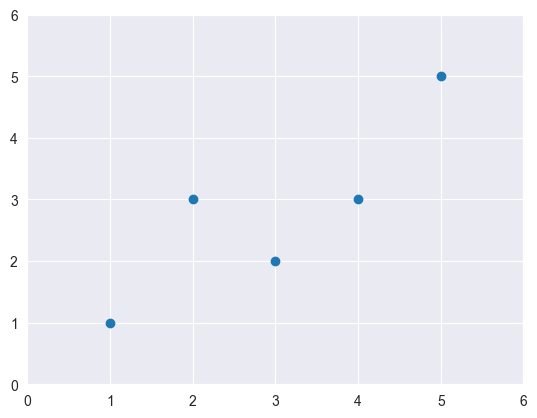

In [3]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])
plt.show()

$$a=\frac{\sum_{i=1}^{m}\left(x^{(i)}-\bar{x}\right)\left(y^{(i)}-\bar{y}\right)}{\sum_{i=1}^{m}\left(x^{(i)}-\bar{x}\right)^{2}},\ b=\bar{y}-a \bar{x}\$$

In [4]:
# Calculate a.
d, m = 0, 0
for x_i, y_i in zip(x, y):
    d += (x_i - x.mean()) * (y_i - y.mean())
    m += (x_i - x.mean()) ** 2

a = d / m

# Calculate b.
b = y.mean() - a * x.mean()

a, b

(0.8, 0.39999999999999947)

In [5]:
y_hat = a * x + b
y_hat

array([1.2, 2. , 2.8, 3.6, 4.4])

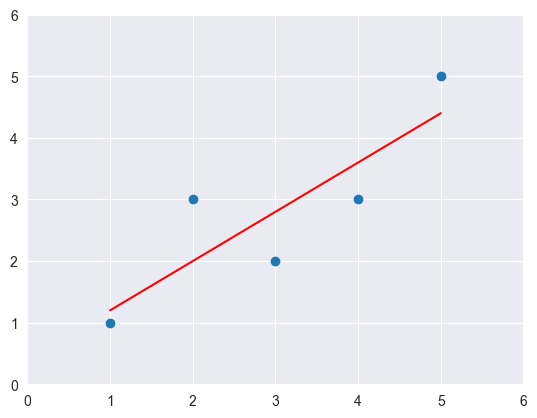

In [6]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

## Making a object to get linear regression

In [40]:
class SimpleLinearRegression:
    def __init__(self):
        """
        Initialization parameters
        """
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        """
        Fit the data and calculate self.a_ and self.b_.
        :param x_train: data of x.
        :param y_train: data of y.
        :return: Object
        """
        # Data type conversion.
        if type(x_train) != np.ndarray: x_train = np.array(x_train)
        if type(y_train) != np.ndarray: y_train = np.array(y_train)

        # Check the length of data.
        assert x_train.ndim == 1 == y_train.ndim, 'The dimension of x and y must be one!!!'
        assert len(x_train) == len(y_train), 'The length of x and y must be equal!!!'

        # Calculate a and b.
        d, m = 0, 0
        for x, y in zip(x_train, y_train):
            d += (x - x_train.mean()) * (y - y_train.mean())
            m += (x - x_train.mean()) ** 2

        self.a_ = d / m
        self.b_ = y_train.mean() - a * x_train.mean()

        return self

    def fit_vector(self, x_train, y_train):
        """
        Fit the data and calculate self.a_ and self.b_.
        :param x_train: data of x.
        :param y_train: data of y.
        :return: Object
        """
        # Data type conversion.
        if type(x_train) != np.ndarray: x_train = np.array(x_train)
        if type(y_train) != np.ndarray: y_train = np.array(y_train)

        # Check the length of data.
        assert x_train.ndim == 1 == y_train.ndim, 'The dimension of x and y must be one!!!'
        assert len(x_train) == len(y_train), 'The length of x and y must be equal!!!'

        # Calculate a and b.
        x_mean, y_mean = np.mean(x_train), np.mean(y_train)
        d = (x_train - x_mean).dot(y_train - y_mean)
        m = (x_train - x_mean).dot(x_train - x_mean)

        self.a_ = d / m
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_test):
        """
        Using input x_test to calculate y_test, y_test = self.a_ * x_test + self.b_
        :param x_test: Input x_test data.
        """
        assert self.a_ is not None, 'Please run object.fit() before predict!!!'

        y_test = np.array([self.predict_(x) for x in x_test])
        return y_test

    def predict_(self, x):
        return self.a_ * x + self.b_

    def __repr__(self):
        return 'SimpleLinearRegression'


demo_ob = SimpleLinearRegression()
# demo_ob.fit(x, y)
demo_ob.fit_vector(x, y)
print(demo_ob.a_, demo_ob.b_)
demo_ob.predict_(x)

8.268557322426979 -30.005120145375827


array([24.36064425, 23.08728642, 29.40446422, 27.858244  , 29.09025904,
       23.16170344, 19.70544648, 21.02841565, 16.55512614, 19.63929802,
       22.7234699 , 19.68064081, 18.68841393, 19.18452737, 20.40000529,
       18.23364327, 19.06876756, 19.52353822, 15.10812861, 17.34890764,
       16.05074414, 19.31682428, 20.78035893, 18.06000357, 18.97781343,
       16.2905323 , 18.06000357, 19.99484598, 23.69915966, 25.17923142,
       17.23314784, 20.20155992, 19.19279592, 17.13392515, 20.40000529,
       19.05223045, 18.29152317, 18.36594019, 19.32509284, 24.5260154 ,
       28.07322649, 25.97301293, 21.00360998, 21.35088938, 20.17675424,
       16.97682256, 17.83675252, 19.85428051, 14.63682084, 16.31533797,
       19.30028717, 20.55710788, 23.83145658, 19.58968667, 18.68014537,
       29.93365188, 22.77308124, 26.35336656, 20.8051646 , 19.0026191 ,
       17.46466744, 19.32509284, 23.37668593, 25.90686447, 28.73471107,
       22.00410541, 17.84502108, 18.5974598 , 16.24918952, 18.65

## performance comparison

In [8]:
NUM = 100000
rand_x = np.random.random(size=NUM)
rand_y = rand_x * 2.0 + 3.0 + np.random.normal(size=NUM)

In [9]:
%%time
demo_ob = SimpleLinearRegression()
demo_ob.fit(rand_x, rand_y)
print(demo_ob.a_, demo_ob.b_)
# demo_ob.predict_(rand_x)

1.9940105008360216 3.6060045680996287
CPU times: total: 7.64 s
Wall time: 22.4 s


In [10]:
%%time
demo_ob = SimpleLinearRegression()
demo_ob.fit_vector(rand_x, rand_y)
print(demo_ob.a_, demo_ob.b_)
# demo_ob.predict_(rand_x)

1.994010500836032 3.6060045680996287
CPU times: total: 0 ns
Wall time: 1.84 ms


## Algorithm Accuracy Evaluation

In [12]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [13]:
data.shape, target.shape

((506, 13), (506,))

In [14]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

(506,) (506,)


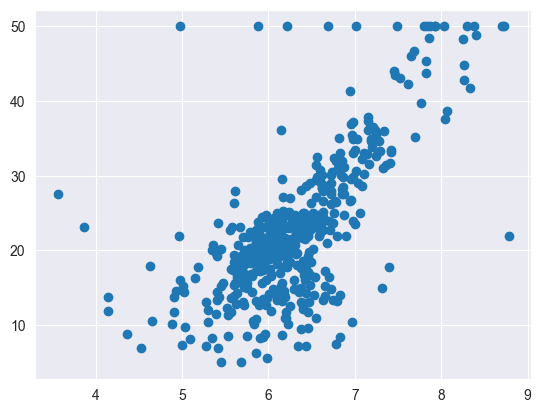

In [49]:
x = data[:, 5]
y = target

print(x.shape, y.shape)

plt.scatter(x, y)
plt.show()

In [50]:
# remove outliers
x = x[y < 50]
y = y[y < 50]
x.shape, y.shape

((490,), (490,))

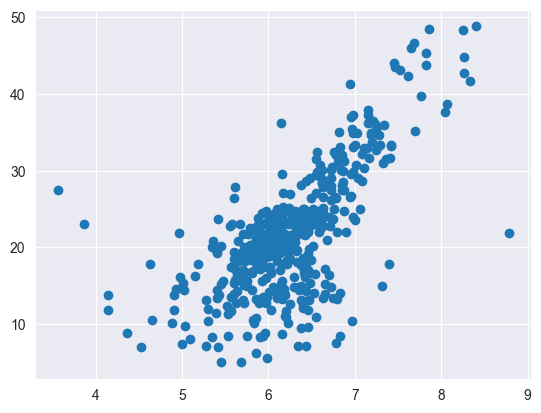

In [51]:
plt.scatter(x, y)
plt.show()

In [52]:
# Split the Feature Dataset and Label Dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.3, random_state=666)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((343,), (147,), (343,), (147,))

In [64]:
demo_ob = SimpleLinearRegression()
demo_ob.fit_vector(x_train, y_train)
print(demo_ob.a_, demo_ob.b_)
# demo_ob.predict_(rand_x)

7.454292791093449 -25.0396650559275


In [65]:
y_predict = demo_ob.predict_(x_test)

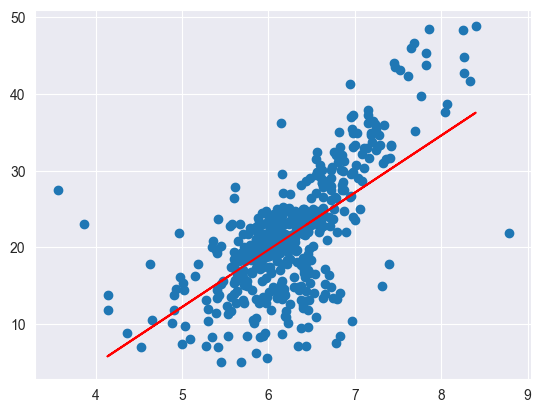

In [66]:
plt.scatter(x, y)
plt.plot(x_test, y_predict, color='r')
plt.show()

### MSE

In [70]:
mse_res = np.sum((y_test - y_predict) ** 2) / len(y_test)
mse_res

29.290626654686513

### RMES

In [71]:
np.sqrt(mse_res)

5.41208154545795

### MAE

In [72]:
np.sum(np.abs(y_predict - y_test) / len(y_test))

4.064841547985004

### MAE and MSE in scikit-learn

In [73]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mean_absolute_error(y_test, y_predict), mean_squared_error(y_test, y_predict)

(4.064841547985005, 29.290626654686513)

### R Squared

In [75]:
1 - mean_squared_error(y_test, y_predict) / np.var(y_test)

0.5805742639307612

In [76]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.5805742639307612

## multiple linear regression

In [97]:
class MulLinearReg:
    """
    The object can support the multiple linear regression
    """

    def __init__(self):
        self._theta = None
        self.coef_ = None
        self.interception_ = None

    def fit_norm(self, X_train, y_train):
        assert X_train.shape[0] == y_train.shape[0], \
            'The size of X and y must be equal!!!'

        X_b = np.hstack([np.ones([X_train.shape[0], 1]), X_train])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def predict(self, X_predict):
        assert self.interception_ is not None and self.coef_ is not None, \
            'You must fit this object before predict!!!'
        assert X_predict.shape[1] == len(self.coef_), \
            'The feature of X_predict must be equal to X_train!!!'

        X_b = np.hstack([np.ones([X_predict.shape[0], 1]), X_predict])
        return X_b.dot(self._theta)

    def __repr__(self):
        return 'MulLinearReg()'

In [78]:
# Test MulLinearReg()
X, y = data, target
X = X[y < 50]
y = y[y < 50]
X.shape, y.shape

((490, 13), (490,))

In [79]:
# Split data
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=666)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((343, 13), (147, 13), (343,), (147,))

In [101]:
demo_ob = MulLinearReg()
demo_ob.fit_norm(X_train, y_train)

MulLinearReg()

In [102]:
demo_ob.interception_, demo_ob.coef_

(36.72972816455894,
 array([-1.10288225e-01,  3.98029539e-02, -2.37196330e-02,  1.59403215e-01,
        -1.25001067e+01,  3.08208257e+00, -1.70993250e-02, -1.19467165e+00,
         2.61862346e-01, -1.33061158e-02, -8.63168785e-01,  7.68159972e-03,
        -4.11980806e-01]))

In [103]:
y_predict = demo_ob.predict(X_test)

In [104]:
r2_score(y_test, y_predict)

0.7984806765825204

## multiple linear regression in scikit-learn

In [107]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [110]:
y_predict = lin_reg.predict(X_test)
r2_score(y_test, y_predict)

0.7984806765825314

In [112]:
lin_reg.score(X_test, y_test)

0.7984806765825314

In [114]:
from sklearn.neighbors import KNeighborsRegressor

# Grid search in sklearn
para_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 20)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1, 6)]
    }
]

knn_reg = KNeighborsRegressor()

In [115]:
%%time

from sklearn.model_selection import GridSearchCV

grid_searcher = GridSearchCV(knn_reg, para_grid, n_jobs=-1, verbose=2)

grid_searcher.fit(X_train, y_train)

Fitting 5 folds for each of 69 candidates, totalling 345 fits
CPU times: total: 188 ms
Wall time: 3.62 s


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=2)

In [116]:
grid_searcher.best_score_

0.624584304838484

In [117]:
grid_searcher.best_params_

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

In [119]:
knn_reg = grid_searcher.best_estimator_
knn_reg.predict(X_test)

array([17.99159865, 33.08715932, 12.18084704, 31.24383344, 23.51584723,
        9.11753264, 31.47552215, 30.74668876, 13.66898977, 32.85110495,
       16.71276753, 21.75317758, 23.92456485, 15.28241652, 21.28539979,
       22.54383103, 14.63379859, 23.93558645, 29.21620422, 28.15402832,
       11.19486558, 22.8581629 , 22.77260631, 27.15384514, 22.11906795,
       29.86101035, 13.5824046 , 24.21256748, 11.41662726, 24.49673901,
       35.23257327, 11.23176366, 11.44849499, 41.96243641, 19.26220517,
       19.18303221,  9.70529001, 27.37096118, 19.19373553, 19.06826024,
       14.43782386, 24.59439618, 15.46547768, 22.10559622, 21.93302938,
       13.83262463, 30.66155057, 34.63601915, 18.65349599, 22.33942727,
       16.92531067, 11.16796678, 23.94630793, 19.76028269, 23.61100902,
       27.16294748, 24.28616868, 17.43237817, 24.09134386, 36.7612366 ,
       19.74025564, 24.98444034, 25.87204182, 11.30800448, 13.20259651,
       24.75488131, 20.75332452, 21.17838091, 29.73906055, 10.81

In [121]:
knn_reg.score(X_test, y_test)

0.6967984032789722

## More details about linear regression

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per \$10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in \$1000\'s

In [124]:
label_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [122]:
demo_ob.interception_, demo_ob.coef_

(36.72972816455894,
 array([-1.10288225e-01,  3.98029539e-02, -2.37196330e-02,  1.59403215e-01,
        -1.25001067e+01,  3.08208257e+00, -1.70993250e-02, -1.19467165e+00,
         2.61862346e-01, -1.33061158e-02, -8.63168785e-01,  7.68159972e-03,
        -4.11980806e-01]))

In [130]:
[label_name[i] for i in np.argsort(demo_ob.coef_)]

['NOX',
 'DIS',
 'PTRATIO',
 'LSTAT',
 'CRIM',
 'INDUS',
 'AGE',
 'TAX',
 'B',
 'ZN',
 'CHAS',
 'RAD',
 'RM']